In [22]:
import pandas as pd

labelled_occupation = pd.read_csv("../../datasets/labelled_occupation.csv", index_col=0)

In [23]:
labelled_occupation.head(10)

,id,title,description,search_kw,occupation
0,14,Data Scientist,Did you know that Jungle Scout collects and pr...,data scientist,Computer and Information Research Scientists
1,536,"Senior Analytics Advisor, Data & Insights",The Condominium Authority of Ontario (CAO) was...,data scientist,Computer Systems Analysts
2,56,Jr. Data Science Developer,The Opportunity\n Are you familiar with Python...,data scientist,Computer and Information Research Scientists
3,1449,Associate Data Scientist,We are looking for a Data Scientist to support...,data scientist,Computer and Information Research Scientists
4,393,Data Scientist,Ceridian. Makes Work Life Better‚Ñ¢\n This is ...,data scientist,Geospatial Information Scientists and Technolo...
5,103,Business Intelligence Analyst,Brand: Glentel Corporate\n Location: Burnaby O...,data scientist,Business Intelligence Analyst
6,459,Manager Advanced Analytics,"At Rogers, we connect Canadians to a world of ...",data scientist,Computer Systems Analysts
7,765,Scientifique de donn√©es - Data Scientist,Ce que vous serez appel√©(e) √† faire\n Joigne...,data scientist,Clinical Data Managers
8,1073,Climate Change Scientist,BGC is looking for a Climate Change Scientist ...,data scientist,Computer and Information Research Scientists
9,1445,Data Scientist - Price Point ‚Äì Start-up company,This company is an e-retailer with a unique me...,data scientist,Computer and Information Research Scientists


In [24]:
predicted_occupation = []
for nums in range(0, 41, 5):
    predicted_occupation.append(pd.read_csv("../../results/ngrams/title_occupation_"+str(nums)+".csv"))

In [25]:
predicted_occupation[0].head(10)

,id,title,identifier,score_all,name
0,1,Data Scientist,15-1111.00,0.841928,Computer and Information Research Scientists
1,2,Business Intelligence Analyst,15-1199.08,0.943399,Business Intelligence Analysts
2,3,Human Resources Data Scientist,15-1111.00,0.846419,Computer and Information Research Scientists
3,4,Lead - Human Resource Data Scientist,15-1111.00,0.842344,Computer and Information Research Scientists
4,5,Machine Learning Engineer,15-1133.00,0.807461,"Software Developers, Systems Software"
5,6,Data Scientist,15-1111.00,0.841928,Computer and Information Research Scientists
6,7,Associate Data Scientist,15-2041.00,0.862040,Statisticians
7,8,Data Scientist I,15-1111.00,0.841928,Computer and Information Research Scientists
8,9,"Data Scientist, AI@Unity",15-1111.00,0.841928,Computer and Information Research Scientists
9,10,Data Scientist,15-1111.00,0.841928,Computer and Information Research Scientists


In [26]:
accuracies = []
for i in range(len(predicted_occupation)):
    correct = 0
    df = predicted_occupation[i]
    for j in range(len(labelled_occupation)):
        occ1 = labelled_occupation.iloc[j]['occupation']
        job_id = labelled_occupation.iloc[j]['id']
        occ2 = df[df['id'] == job_id]['name'].values[0]
        if occ1 == occ2:
            correct += 1
    accuracies.append(correct / len(labelled_occupation) * 100)


In [27]:
accuracies

[34.0, 43.0, 47.0, 54.0, 59.0, 61.0, 63.0, 72.0, 73.0]

Text(0.5, 1.0, 'Line chart showing the accuracies for top n-gram words')

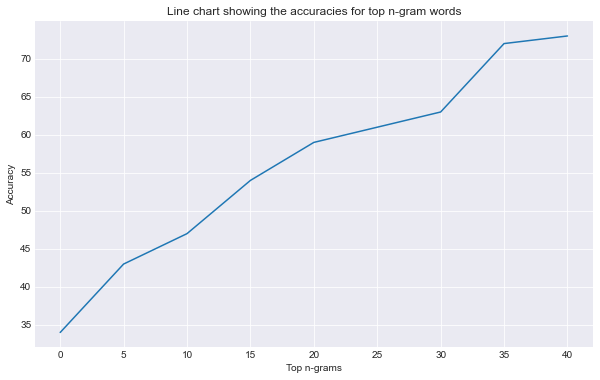

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')
plt.plot(range(0, 41, 5), accuracies)
plt.xlabel("Top n-grams")
plt.ylabel("Accuracy")
plt.title("Line chart showing the accuracies for top n-gram words")